인터파크 티켓 순위 데이터 뽑기
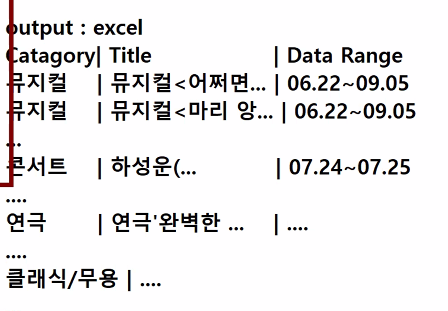

In [1]:
from selenium import webdriver

In [2]:
browser= webdriver.Chrome('./chromedriver.exe')

In [17]:
browser.get('http://ticket.interpark.com/Contents/Ranking?smid1=s_menu&smid2=performance')

In [18]:
html= browser.page_source

In [19]:
from bs4 import BeautifulSoup

In [20]:
soup= BeautifulSoup(html, 'html.parser')

In [30]:
tags= soup.select('div.genreItems')

In [31]:
len(tags), type(tags)

(8, bs4.element.ResultSet)

In [32]:
tag= tags[0]

In [33]:
name= tag.select('a.prdName')

In [34]:
len(name), type(name)

(25, bs4.element.ResultSet)

In [39]:
name

[<a class="prdName" href="javascript:;" onclick="Go('21003166', 'Y', ''); ">뮤지컬 〈라 레볼뤼시옹〉</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21000206', 'Y', ''); ">뮤지컬 〈팬텀〉</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21004531', 'Y', ''); ">뮤지컬 〈스프링 어웨이크닝〉</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21002454', 'Y', ''); ">뮤지컬 〈위키드〉 - 부산 초연 (Musical Wicked)</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21003130', 'Y', ''); ">2021 뮤지컬 〈마마,돈크라이〉 10+1주년 기념 공연</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21003923', 'Y', ''); ">뮤지컬 〈어쩌면 해피엔딩〉 2021</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21004304', 'Y', ''); ">뮤지컬 〈마리 앙투아네트〉</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21002720', 'Y', ''); ">뮤지컬 드라큘라 (Dracula：The Musical)</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21003704', 'Y', ''); ">뮤지컬 〈와일드 그레이〉</a>,
 <a class="prdName" href="javascript:;" onclick="Go('21004532', 'Y', ''); ">뮤지컬 〈빌리 엘

In [36]:
duration= soup.select('a.prdDuration')

In [37]:
duration

[<a class="prdDuration" href="javascript:;" onclick="Go('21003166', 'Y', ''); ">05.18~08.01</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21000206', 'Y', ''); ">03.17~06.27</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21004531', 'Y', ''); ">07.08~10.03</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21002454', 'Y', ''); ">05.20~06.27</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21003130', 'Y', ''); ">05.27~08.22</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21003923', 'Y', ''); ">06.22~09.05</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21004304', 'Y', ''); ">07.13~10.03</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21002720', 'Y', ''); ">05.20~08.01</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21003704', 'Y', ''); ">06.03~08.15</a>,
 <a class="prdDuration" href="javascript:;" onclick="Go('21004532', 'Y', ''); ">08.31~02.02</a>,
 <a class="prdDuration" href="

In [40]:
for tag in tags:
    name= tag.select('a.prdName')
    duration= tag.select('a.prdDuration')
    print(name[0].text.strip(), duration[0].text.strip())

뮤지컬 〈라 레볼뤼시옹〉 05.18~08.01
2021 SOMEDAY THEATRE CANTABILE ＃3 07.09~07.11
공포연극 〈조각〉 06.29~07.31
KT와 함께하는 예술의전당 마음을 담은 클래식(7월) 07.23~07.23
2021 The Esports Night 철권7 팀리그 (6.25) 06.25~06.25
2021 함양 대봉스카이랜드 ( 모노레일＆짚라인 ) (21.07 ~) 07.01~07.31
마르첼로 바렌기展 04.24~08.22
음악극 〈리틀뮤지션〉 2021 예술의전당 어린이 가족 페스티벌 08.12~08.22


In [41]:
contents= list()
for tag in tags:
    name= tag.select('a.prdName')
    duration= tag.select('a.prdDuration')
    contents.append([name[0].text.strip(), duration[0].text.strip()])

In [42]:
import pandas as pd

In [43]:
pd.DataFrame(contents)

,0,1
0,뮤지컬 〈라 레볼뤼시옹〉,05.18~08.01
1,2021 SOMEDAY THEATRE CANTABILE ＃3,07.09~07.11
2,공포연극 〈조각〉,06.29~07.31
3,KT와 함께하는 예술의전당 마음을 담은 클래식(7월),07.23~07.23
4,2021 The Esports Night 철권7 팀리그 (6.25),06.25~06.25
5,2021 함양 대봉스카이랜드 ( 모노레일＆짚라인 ) (21.07 ~),07.01~07.31
6,마르첼로 바렌기展,04.24~08.22
7,음악극 〈리틀뮤지션〉 2021 예술의전당 어린이 가족 페스티벌,08.12~08.22


In [44]:
pd_data= pd.DataFrame(contents, columns=['name', 'duration'])

In [ ]:
# pd_data.to_excel('./saves/interpark_scraping.xls', index= False)